In [23]:
import pandas as pd
dtype={
      'culmen_length_mm':float,
      'culmen_depth_mm':float,
    'flipper_length_mm':float,
    'body_mass_g':float
       }   
data = pd.read_csv('penguins_size.csv', header=1, index_col=False,
                  names=['species','island','culmen_length_mm',
                         'culmen_depth_mm','flipper_length_mm','body_mass_g','sex'],dtype=dtype)
#为了方便展示，我们选取其中一部分数据
data_lite = data.iloc[: ,:]

#下面看一下数据的前5行是不是我们想要的结果
display(data_lite.head())

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
1,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
2,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [24]:
# k = 6
# d3=pd.qcut(data,k)   等频离散
data_lite['cl'] = pd.cut(data_lite.iloc[:,2],3)
data_lite['cd'] = pd.cut(data_lite.iloc[:,3],3)
data_lite['fl'] = pd.cut(data_lite.iloc[:,4],3)
data_lite['bm'] = pd.cut(data_lite.iloc[:,5],3)
data_com = data_lite
data_lite['sex1'] = data_lite['sex']
data_lite = data_lite.drop(['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g','sex'],axis=1)
display(data_lite.head())

,species,island,cl,cd,fl,bm,sex1
0,Adelie,Torgersen,"(32.072, 41.267]","(15.9, 18.7]","(171.941, 191.667]","(2696.4, 3900.0]",FEMALE
1,Adelie,Torgersen,"(32.072, 41.267]","(15.9, 18.7]","(191.667, 211.333]","(2696.4, 3900.0]",FEMALE
2,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
3,Adelie,Torgersen,"(32.072, 41.267]","(18.7, 21.5]","(191.667, 211.333]","(2696.4, 3900.0]",FEMALE
4,Adelie,Torgersen,"(32.072, 41.267]","(18.7, 21.5]","(171.941, 191.667]","(2696.4, 3900.0]",MALE


In [25]:
data_dummies = pd.get_dummies(data_lite)

In [26]:
data_dummies

,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,"cl_(32.072, 41.267]","cl_(41.267, 50.433]","cl_(50.433, 59.6]","cd_(13.092, 15.9]",...,"cd_(18.7, 21.5]","fl_(171.941, 191.667]","fl_(191.667, 211.333]","fl_(211.333, 231.0]","bm_(2696.4, 3900.0]","bm_(3900.0, 5100.0]","bm_(5100.0, 6300.0]",sex1_.,sex1_FEMALE,sex1_MALE
0,1,0,0,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,1,0,0,0,0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,1,0,0,0,...,1,0,1,0,1,0,0,0,1,0
4,1,0,0,0,0,1,1,0,0,0,...,1,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
339,0,0,1,1,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
340,0,0,1,1,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
341,0,0,1,1,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0


In [27]:
features = data_dummies.iloc[:,6:18]
X = features.values
y = data_dummies.iloc[:,19].values

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
forest = RandomForestClassifier(n_estimators=25,random_state=3)
forest.fit(X_train, y_train)
print(forest.score(X_test, y_test))

0.7906976744186046


In [29]:
Mr_Z =[[1,0,0,0,1,0,0,1,0,1,0,0]]
dating_dec = forest.predict(Mr_Z)
if dating_dec == 1:
    print("man")
else:
    print("female")

man


画图

In [35]:
features1 = data_dummies.iloc[:,[6,9]]
X = features1.values
y = data_dummies.iloc[:,19].values

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
forest = RandomForestClassifier(n_estimators=25,random_state=3)
forest.fit(X_train, y_train)
print(forest.score(X_test, y_test))

0.6162790697674418


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14212\2609330564.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


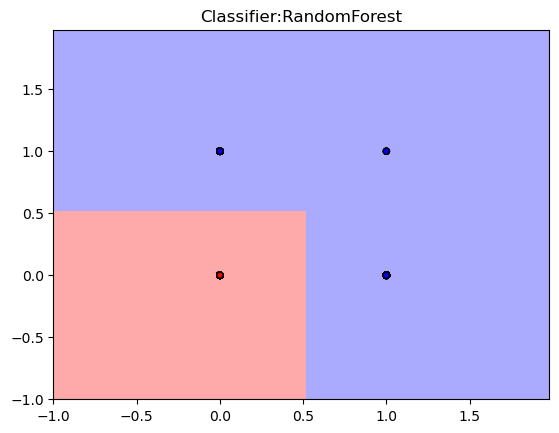

In [40]:
#定义图像中分区的颜色和散点的颜色
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#分别用样本的两个特征值创建图像和横轴和纵轴
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = forest.predict(np.c_[xx.ravel(), yy.ravel()])

#给每个分类中的样本分配不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#用散点把样本表示出来
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:RandomForest")


plt.scatter(x,y,c = 'r',marker = 'o')  

plt.show()

In [41]:
data_com

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cl,cd,fl,bm,sex1
0,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,"(32.072, 41.267]","(15.9, 18.7]","(171.941, 191.667]","(2696.4, 3900.0]",FEMALE
1,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,"(32.072, 41.267]","(15.9, 18.7]","(191.667, 211.333]","(2696.4, 3900.0]",FEMALE
2,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,"(32.072, 41.267]","(18.7, 21.5]","(191.667, 211.333]","(2696.4, 3900.0]",FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,"(32.072, 41.267]","(18.7, 21.5]","(171.941, 191.667]","(2696.4, 3900.0]",MALE
...,...,...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,"(41.267, 50.433]","(13.092, 15.9]","(211.333, 231.0]","(3900.0, 5100.0]",FEMALE
340,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,"(41.267, 50.433]","(13.092, 15.9]","(211.333, 231.0]","(5100.0, 6300.0]",MALE
341,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,"(41.267, 50.433]","(13.092, 15.9]","(211.333, 231.0]","(5100.0, 6300.0]",FEMALE
